#Introduction
This project will explore the data of Citi Bike in New York. This bikesharing system provided a dataset containing over 17 million trips. The first section is the data analysis and visualization. Here the data will be prepared and treated so it’s easy to manipulate in later stages. This section also includes visualization to get insight into the data. The second part is a prediction challenge. This challenge firstly clusters the stations. Then a regression model is built to predict pickups and drop-offs. Lastly, the output of the regression model is used to compute how many bikes have to be moved by Citi bike overnight to avoid shortages. The following section will address a new research question **ADD RQ**. Lastly section 4 concludes the project.

Julius Sørensen s184799

Laurens Dergent s231833

Andrease Hornemann s194236


**Python Libraries**

In [1]:
#Import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import seaborn as sns

# Section 1: Data Analysis & Visualization

In [3]:
#Connect with Google Drive
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Loading in the data**

Firstly the full dataset is loaded. Secondly a copy of the dataset is made. This is done to make sure we can easily shift between the original and manipulated dataset.

In [2]:
# df_big = pd.read_csv('/content/drive/MyDrive/42577/Trips_2018.csv')
df_big = pd.read_csv('Trips_2018.csv')

In [3]:
df = df_big.copy()

**introduction to the Data**

A first look at the dataset, including the information of all the features.

In [4]:
#Overview of the first five entries of our dataframe
df.head(5)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
#Basic information about the dtypes of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB




*Description of the features*
  * **starttime & stoptime**: very exact timestamps including fractions of a second. This will be converted to datetime & can be used for time series analysis, trends anaysis and demand prediction.
  * **tripduration**: delta between starttime & stoptime in seconds
  * **start_station_id & end_station_id**: unique identifier for stations, and tells us where a trip starts & ends
  * **start&end latitude&longitude**: Geographical coordinates for the stations
  * **bikeid**: Unique identifier for bikes
  * **usertype**: Categorical variable if the user is subscriber or casual rider
  * **birth_year**: Categorical variable telling when the user was born. Might be converted into age variable to make it easier to understand.
  * **gender**: Categorical variable representing gender. We do not know which represents female, male and other

**Date Cleaning & Preprocessing**

this subsection preprocesses some of the columns. Firstly column 'unnamed' is deleted as it has the same information as the index column. Next, the start and stoptime are changed into the right datetime format and rounded to a second. Based on these updated columns the tripduration is recalculated. Finally a new column is added for 'age'.

In [6]:
# Set index and dropping the "unnamed:0 column"
df.set_index('Unnamed: 0', inplace=True)

In [7]:
df.index.name = 'index'

In [8]:
# Change starttime and stoptime features to datetimes
df['starttime'] = pd.to_datetime(df['starttime']).dt.floor('s')
df['stoptime'] = pd.to_datetime(df['stoptime']).dt.floor('s')

In [9]:
# Recalculate tripdurations, due to roundoff errors
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds().astype(int)

In [10]:
# Calculate an age feature instead of the birth_year feature
df['age'] = 2018 - df['birth_year']

In [11]:
# Show the first 5 entries with updated features and dtypes
df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age
index,,,,,,,,,,,,,,
0,971,2018-01-01 13:50:57,2018-01-01 14:07:08,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,26
1,723,2018-01-01 15:33:30,2018-01-01 15:45:33,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,49
2,497,2018-01-01 15:39:18,2018-01-01 15:47:35,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,62
3,307,2018-01-01 15:40:13,2018-01-01 15:45:20,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,44
4,306,2018-01-01 18:14:51,2018-01-01 18:19:57,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,26


In [13]:
# Output info again to verify datatypes are correct. So we can proceed with
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int32         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bikeid                   int64         
 10  usertype                 object        
 11  birth_year               int64         
 12  gender                   int64         
 13  age                      int64         
dtypes: datetime64[ns](2), float64(6), int32(1), int64(4), object(1)
memory usage: 1.9+ GB


In [14]:
# Describe function to calculate statistical values. we include all features to include the usertype
df.describe(include='all')

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age
count,1.754834e+07,17548339,17548339,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,17548339,1.754834e+07,1.754834e+07,1.754834e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subscriber,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15614825,NaN,NaN,NaN
mean,9.892458e+02,2018-07-16 04:41:18.496440320,2018-07-16 04:57:47.742228224,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,NaN,1.978993e+03,1.148613e+00,3.900750e+01
min,6.100000e+01,2018-01-01 00:01:50,2018-01-01 00:05:07,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,NaN,1.885000e+03,0.000000e+00,1.600000e+01
25%,3.590000e+02,2018-05-08 21:14:05,2018-05-08 21:31:18.500000,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,NaN,1.969000e+03,1.000000e+00,2.900000e+01
50%,6.050000e+02,2018-07-19 16:46:36,2018-07-19 17:03:37,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,NaN,1.981000e+03,1.000000e+00,3.700000e+01
75%,1.061000e+03,2018-09-27 14:52:05,2018-09-27 15:07:04,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,NaN,1.989000e+03,1.000000e+00,4.900000e+01
max,1.951365e+07,2018-12-31 23:59:51,2019-01-08 08:39:45,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,NaN,2.002000e+03,2.000000e+00,1.330000e+02


In [15]:
# Check how many unique values
df.nunique()

tripduration                  30684
starttime                  11227725
stoptime                   11255292
start_station_id                818
start_station_latitude          830
start_station_longitude         835
end_station_id                  850
end_station_latitude            862
end_station_longitude           867
bikeid                        15244
usertype                          2
birth_year                      109
gender                            3
age                             109
dtype: int64

  The describe and nunique functions give us a first feeling on how data is distributed for some features. The insights are listed below:
  
  * **tripduration**: Average tripduration is 989 seconds (Just around 16.5 minutes). The trips range from 61 seconds (1 minute) to 1950000 seconds (541-ish hours). This is obviously some huge outliers.
  * **starttime & stoptime**: data ranged from 2018-01-01 to 2019-01-08.
  * **usertype**: most people seems to be subscribers with a few people classified as users
  * **age**: the average age is 44. The oldest use is 138 years old (seems wrong) and the youngest is 21 years old
  * **Gender**: there is an overweight of one gender using the service. Which gender this is, we do not know. There is also a 3rd gender

**Outlier Removal**

The following part visualizes and removes outliers. This section is important as some of the methods used later can be sensitive to outliers. (for example: k-means clustering). The outliers are visualized through boxplots.

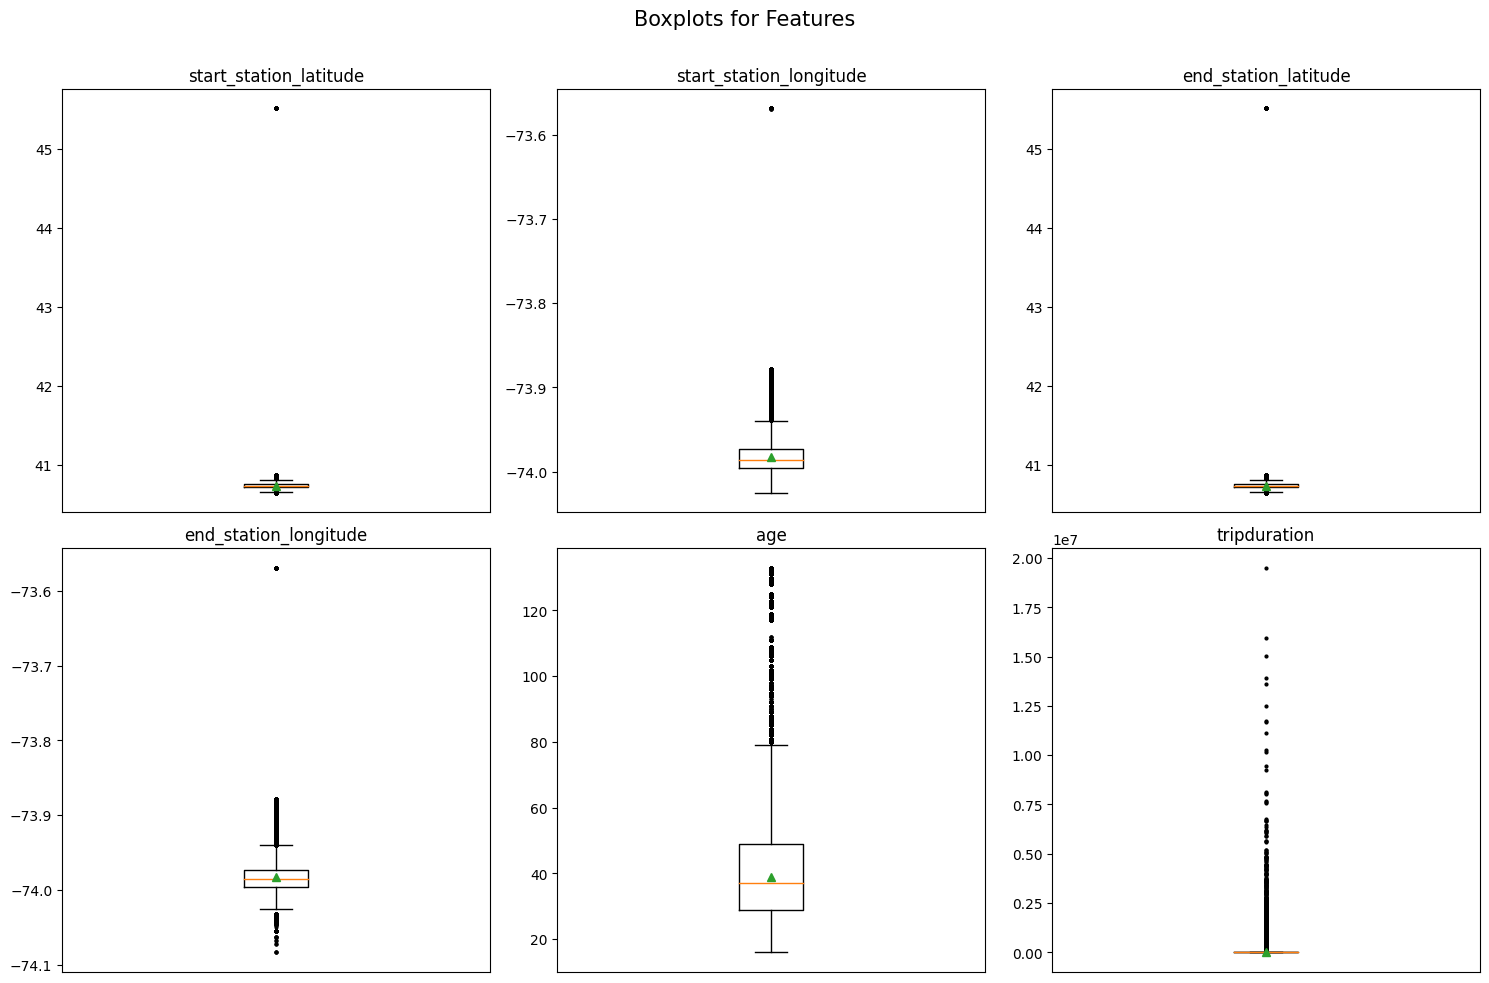

In [16]:
features = ['start_station_latitude', 'start_station_longitude','end_station_latitude',
            'end_station_longitude','age','tripduration']
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Calculate rows and columns of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle("Boxplots for Features", fontsize=15)

# Flatten the axes array to easily iterate through subplots
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.boxplot(df[feature], showmeans=True, flierprops=flierprops)
    ax.set_title(feature)
    ax.get_xaxis().set_visible(False)

# Hide unused subplots
for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

A lot of outliers can be seen on most of the boxplots.  Especially incremenetal outliers on age & tripduration which is a worrying finding. We have still decided to filter them out using IQR upper_bound & IQR lower_bound. We decided to do this to treat all outliers similarly and not to do any 'cherry' pickings. The code below calculates the IQR bounds and the number of outliers.

In [17]:
# Outlier computations
features = ['start_station_latitude', 'start_station_longitude','end_station_latitude',
            'end_station_longitude','age','tripduration']
# Calculate the interquantile range and finding outliers that are visually represented above
for i in features:
    q1=np.quantile(df[i], 0.25)
    q3=np.quantile(df[i], 0.75)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    # Isolate outliers that are outside the threshold values computed in the IQR
    outliers = df[(df[i] <= lower_bound) | (df[i] >= upper_bound)]
    print(i)
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    print("Total count: ",len(df[i]))
    print("Outliers in feature:", len(outliers))
    print(round(len(outliers)/len(df[i])*100),"%")
    print("------------------------------------------")

start_station_latitude
Total count:  17535312
Outliers in feature: 13027
0 %
------------------------------------------
start_station_longitude
Total count:  17147926
Outliers in feature: 387386
2 %
------------------------------------------
end_station_latitude
Total count:  17136854
Outliers in feature: 11072
0 %
------------------------------------------
end_station_longitude
Total count:  16888674
Outliers in feature: 248180
1 %
------------------------------------------
age
Total count:  16867249
Outliers in feature: 23064
0 %
------------------------------------------
tripduration
Total count:  16072879
Outliers in feature: 794370
5 %
------------------------------------------


**Boxplots without outliers**

Below the boxplots are shown again without the outliers. The boxplots aren't 'squashed' anymore as before thanks to the removal of extreme outliers.


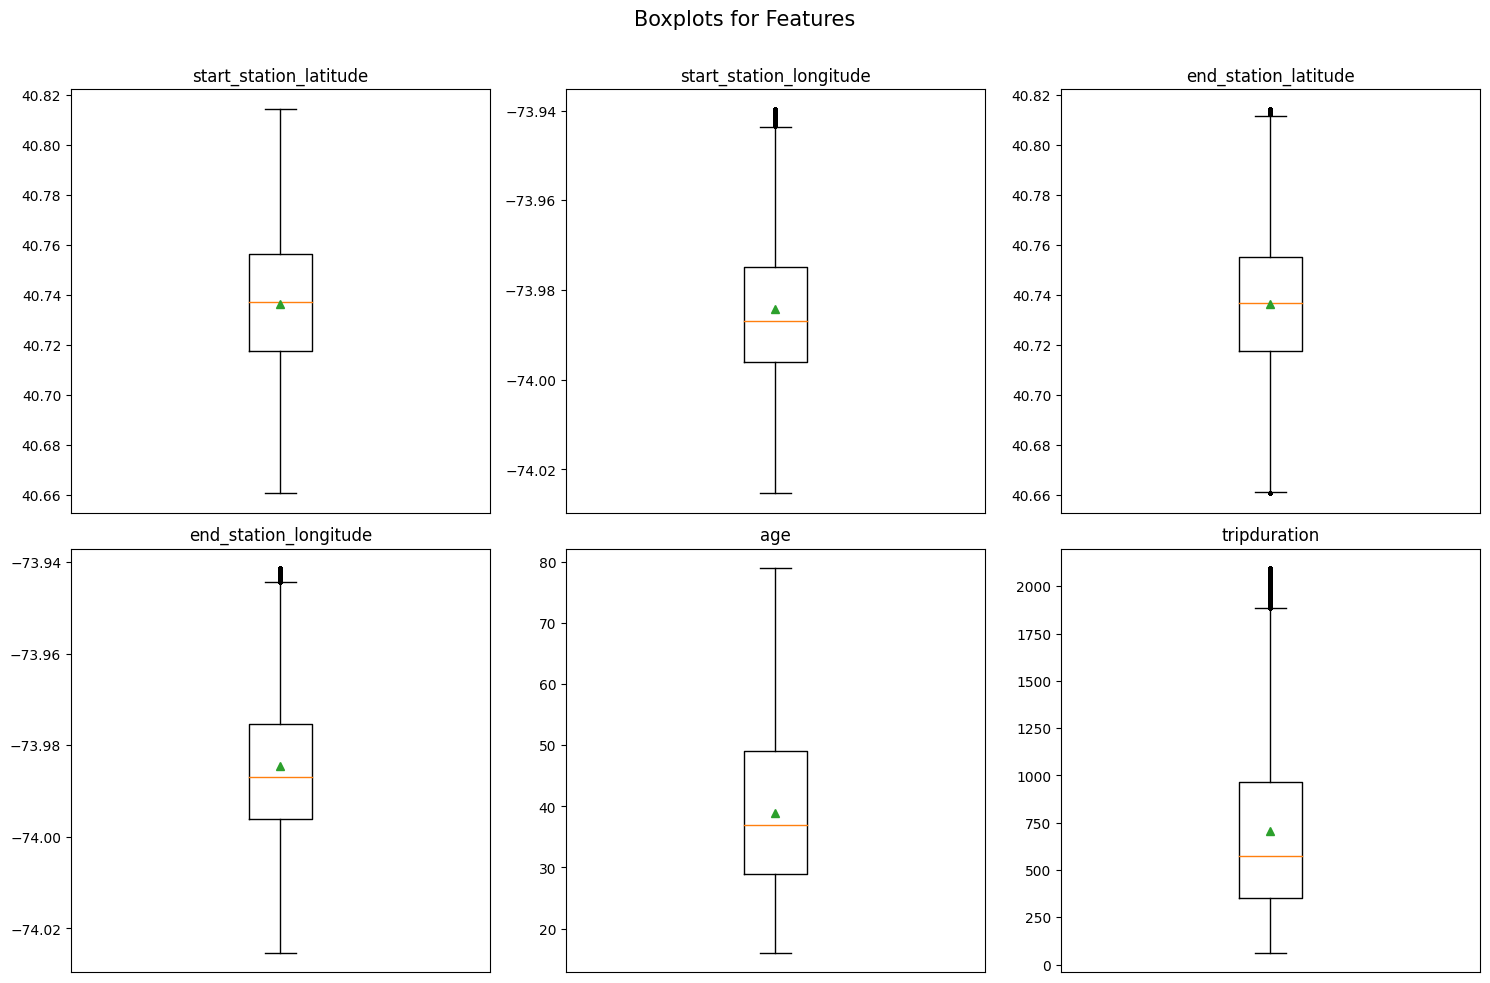

In [18]:
features = ['start_station_latitude', 'start_station_longitude','end_station_latitude',
            'end_station_longitude','age','tripduration']
flierprops = dict(marker='o', markerfacecolor='black', markersize=2, linestyle='none')

# Calculate rows and columns of subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle("Boxplots for Features", fontsize=15)

# Flatten the axes array to easily iterate through subplots
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    ax.boxplot(df[feature], showmeans=True, flierprops=flierprops)
    ax.set_title(feature)
    ax.get_xaxis().set_visible(False)

# Hide unused subplots
for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**Visualizations**

The next subsection visualizes some of the features. Firstly a plot is made to check if a user is a subscriber or not. Clearly, most of the users are subscribers. Another plot is made to see the split across genders.

In [19]:
import warnings
warnings.filterwarnings('ignore')

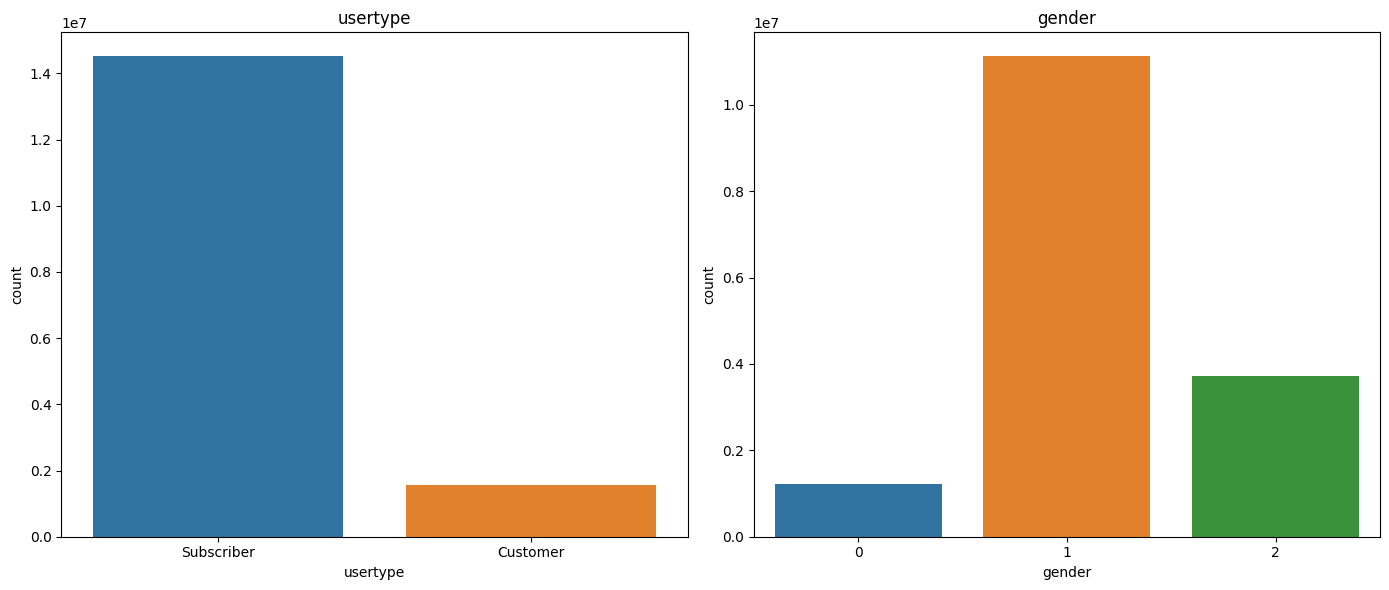

In [20]:
#Data visualization of categorical data; gender and usertype
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='usertype', data=df)
plt.title('usertype')
plt.xlabel('usertype')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=df)
plt.title('gender')
plt.xlabel('gender')
plt.ylabel('count')

plt.tight_layout()
plt.show()

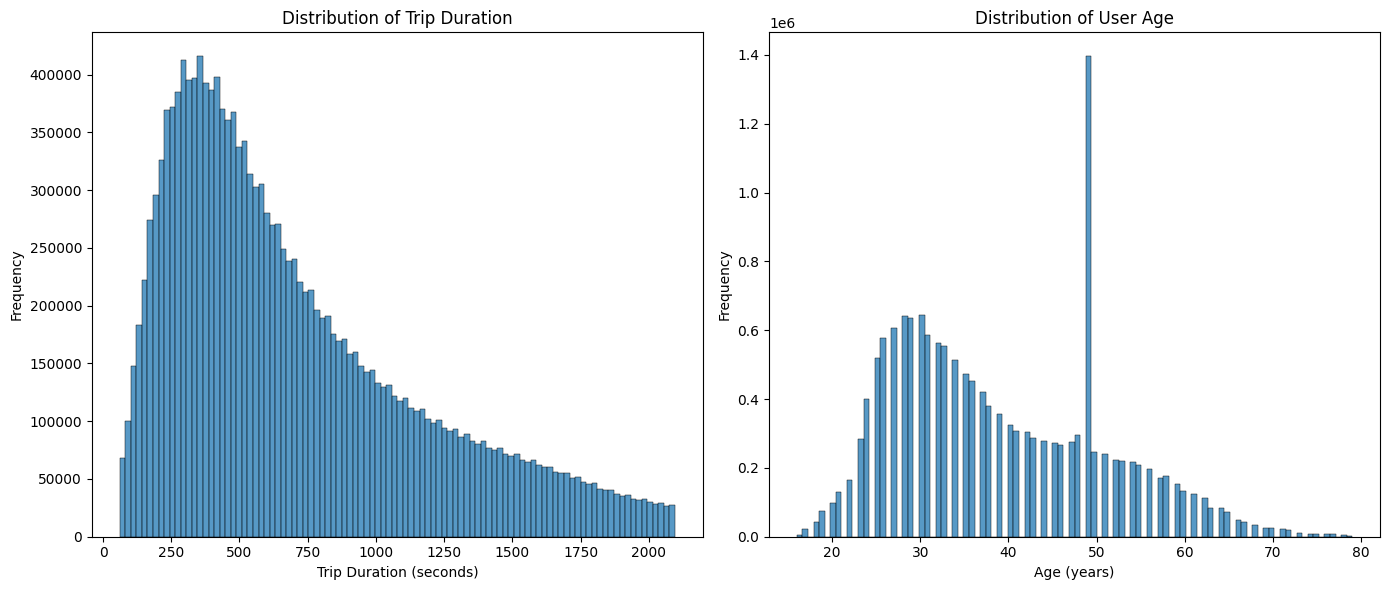

In [21]:
# Display distributions of ages and trip durations
# Initialize the figure
plt.figure(figsize=(14, 6))

# Histogram for 'tripduration'
plt.subplot(1, 2, 1)
sns.histplot(df['tripduration'], bins=100)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')

# Histogram for 'age'
plt.subplot(1, 2, 2)
sns.histplot(df['age'], bins=100)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The plots above show frequency vs tripduration and frequency vs age. Trip Duration follows a gaussian distribution after outlier removal. Even after outlier removal there is a weird spike of users aged 54. This is most likely just a coincidence. The plot below shows the number of trips over a year. Trips seems to be increasing in the hotter months & decreasing in the colder months.

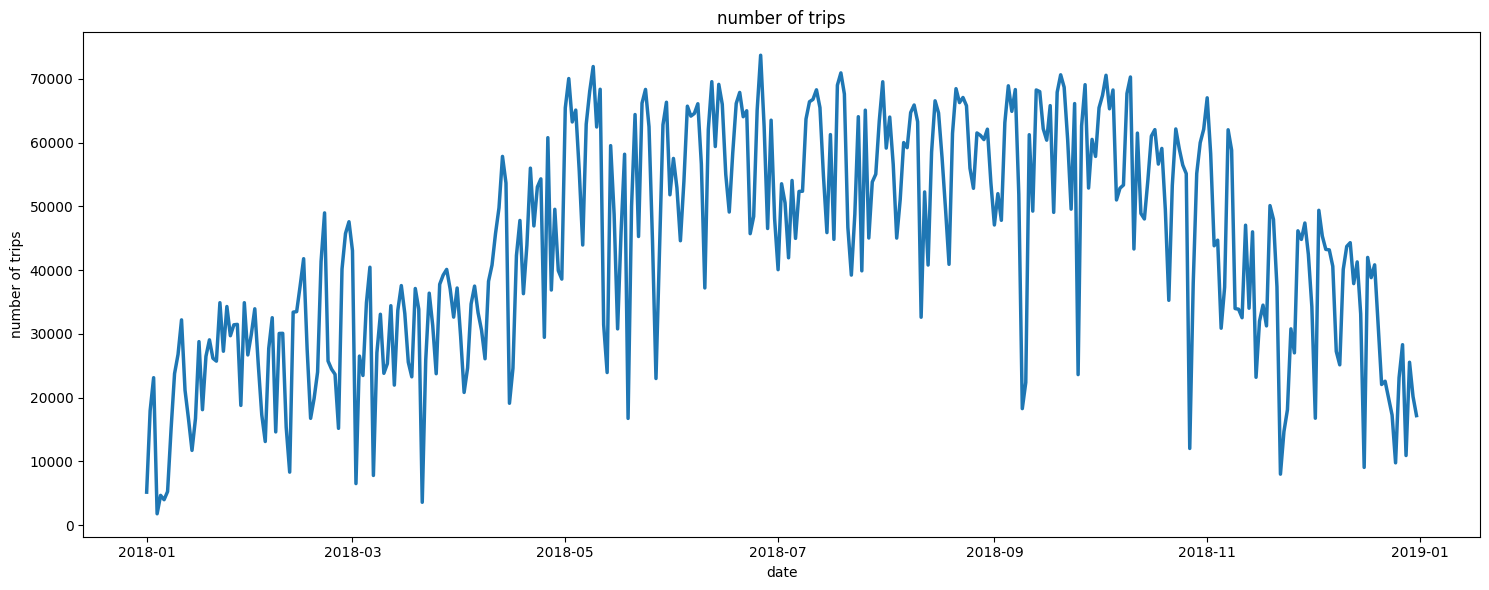

In [22]:
#Plot the number of trips over the whole duration
daily_trips = df.groupby(df['starttime'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_trips.plot(linewidth=2.5)
plt.title('number of trips')
plt.xlabel('date')
plt.ylabel('number of trips')
plt.tight_layout()
plt.show()

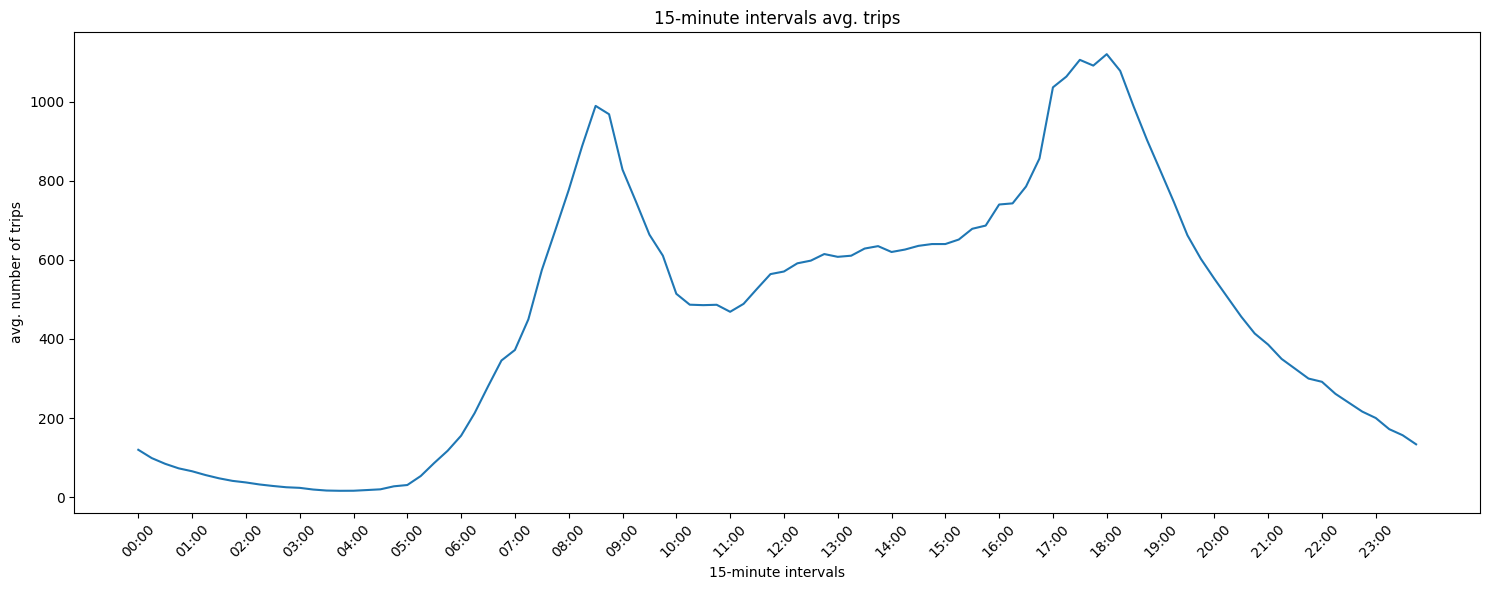

In [23]:
# Create a new 'interval' column to group by
df['interval'] = df['starttime'].dt.strftime('%H:') + (df['starttime'].dt.minute // 15 * 15).astype(str).str.zfill(2)

# Compute the average trips per 15-minute interval
avg_trips = df.groupby('interval').size() / len(df['starttime'].dt.date.unique())

# Plotting
plt.figure(figsize=(15, 6))
avg_trips.plot()
plt.title('15-minute intervals avg. trips')
plt.xlabel('15-minute intervals')
plt.ylabel('avg. number of trips')
plt.xticks(ticks=range(0, len(avg_trips), 4), labels=avg_trips.index[::4], rotation=45)
plt.tight_layout()
plt.show()


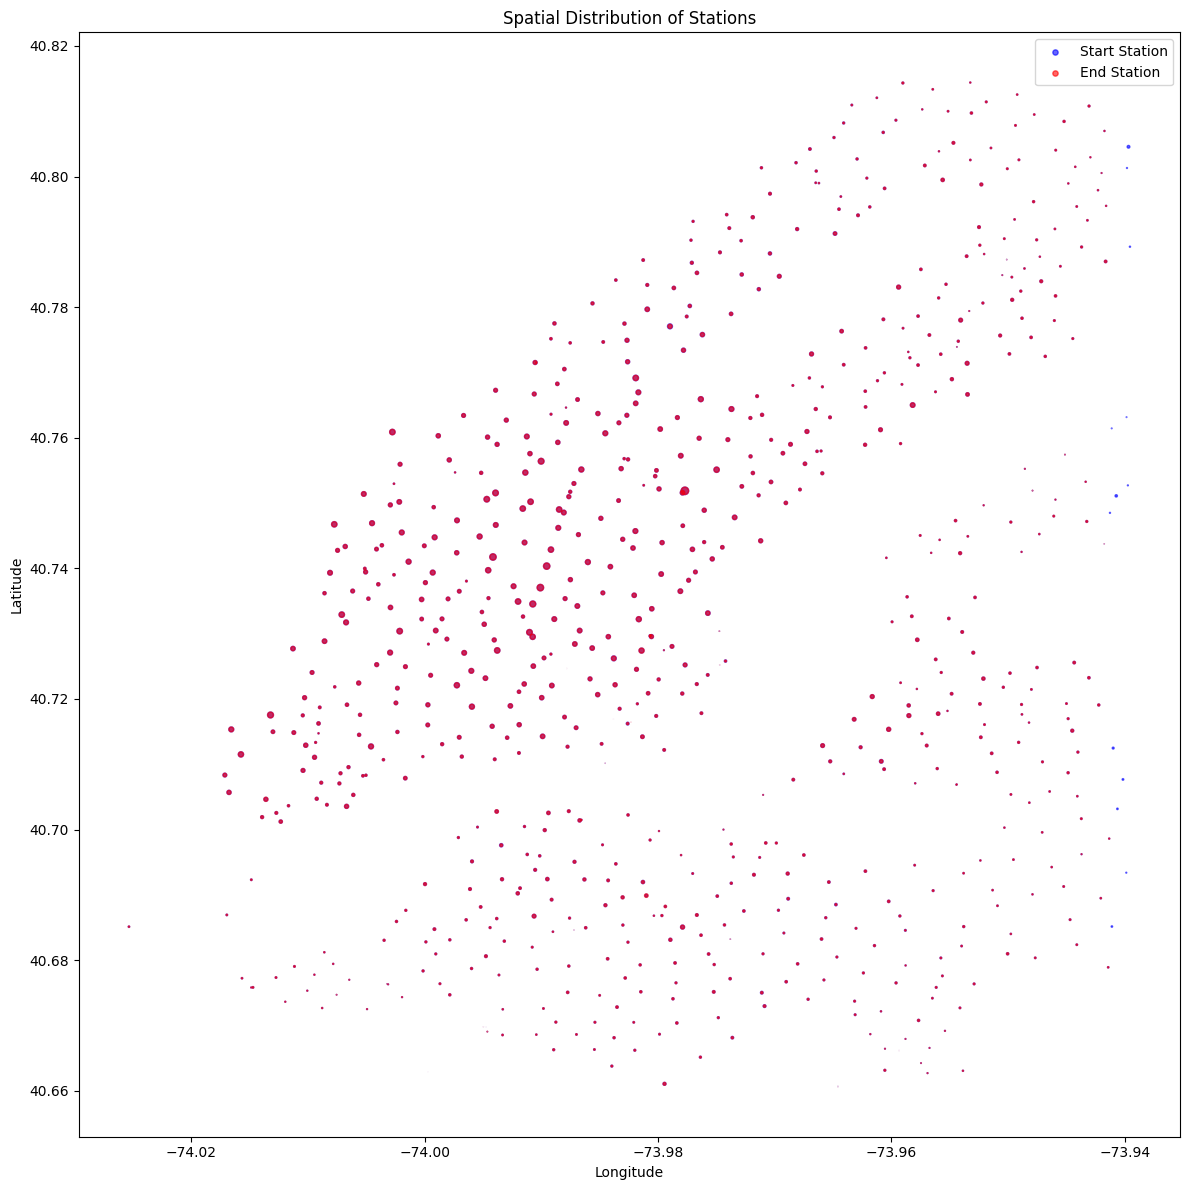

In [24]:
# Group by start station coordinates and count the number of trips starting at each station
start_station_counts = df.groupby(['start_station_latitude', 'start_station_longitude']).size().reset_index(name='trip_counts')

# Group by end station coordinates and count the number of trips ending at each station
end_station_counts = df.groupby(['end_station_latitude', 'end_station_longitude']).size().reset_index(name='trip_counts')

# Plotting
plt.figure(figsize=(12, 12))

# Plot start stations
plt.scatter(start_station_counts['start_station_longitude'], start_station_counts['start_station_latitude'],
            s=start_station_counts['trip_counts'] / 5000, color='blue', alpha=0.6, label='Start Station')

# Plot end stations
plt.scatter(end_station_counts['end_station_longitude'], end_station_counts['end_station_latitude'],
            s=end_station_counts['trip_counts'] / 5000, color='red', alpha=0.6, label='End Station')


plt.title('Spatial Distribution of Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



* **Further work.**
* Remove outliers? CHECK
* Run with full dataset CHECK
* Analysis NOT DONE
* Heatmap NOT DONE
* dunique CHECK
* dimensionality reduction discussion NOT DONE

**Clustering**

In [25]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,interval
index,,,,,,,,,,,,,,,
0,971,2018-01-01 13:50:57,2018-01-01 14:07:08,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,26,13:45
1,723,2018-01-01 15:33:30,2018-01-01 15:45:33,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,49,15:30
2,497,2018-01-01 15:39:18,2018-01-01 15:47:35,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,62,15:30
3,307,2018-01-01 15:40:13,2018-01-01 15:45:20,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,44,15:30
4,306,2018-01-01 18:14:51,2018-01-01 18:19:57,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,26,18:00


**>Q.Cluster the stations spatially (nearby departing stations should be grouped together)
in no less than 20 clusters. Tasks 2 and 3 will be based on the results of this
clustering, and analysis should be performed on at least one cluster (e.g., the one
with the largest demand). More is preferab**le.

Let's start by interpreting the question. I notice two things.

>1 Departing stations should be grouped together - I assume this means start stations.
>
>2 The stations should be clustered spatially, this means that we actually only need one record for each start station id, latitude and longitude

This means that the first step is to identify all the unique combinations of start_station_id, start_station_latitude & start_station_longitude

In [34]:
#importing clustering sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [35]:
#Drop dublicates and finding unique IDs
departing_stations = df[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates()
departing_stations = departing_stations.reset_index(drop=True)


In [36]:
departing_stations

,start_station_id,start_station_latitude,start_station_longitude
0,72.0,40.767272,-73.993929
1,79.0,40.719116,-74.006667
2,82.0,40.711174,-74.000165
3,83.0,40.683826,-73.976323
4,119.0,40.696089,-73.978034
...,...,...,...
730,3715.0,40.718170,-73.955201
731,530.0,40.771497,-73.990460
732,3718.0,40.727464,-73.979504
733,3719.0,40.683223,-73.973812


In [37]:
scaler = StandardScaler()


In [38]:
departing_stations[['start_station_latitude', 'start_station_longitude']] = scaler.fit_transform(departing_stations[['start_station_latitude', 'start_station_longitude']])

In [39]:
departing_stations.head(5)

,start_station_id,start_station_latitude,start_station_longitude
0,72.0,0.927909,-0.866868
1,79.0,-0.282069,-1.492571
2,82.0,-0.481603,-1.173221
3,83.0,-1.168748,-0.002047
4,119.0,-0.860620,-0.086088


In [40]:
#Define Kmeans and start param n_clusters = 20
kmeans = KMeans(n_clusters=20, random_state=42)
departing_stations['clusterKMean'] = kmeans.fit_predict(departing_stations[['start_station_latitude', 'start_station_longitude']])

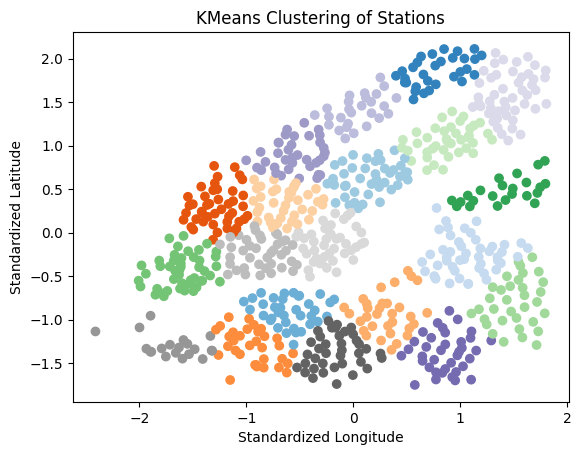

In [41]:
import matplotlib.pyplot as plt

plt.scatter(departing_stations['start_station_longitude'], departing_stations['start_station_latitude'], c=departing_stations['clusterKMean'],cmap='tab20c')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('KMeans Clustering of Stations')
plt.show()


**Ignore the DBScan. It is currently broken**

In [52]:
#Initialize DBscan with min samples 5
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You might need to adjust these parameters
departing_stations['clusterDBScan'] = dbscan.fit_predict(departing_stations[['start_station_latitude', 'start_station_longitude']])

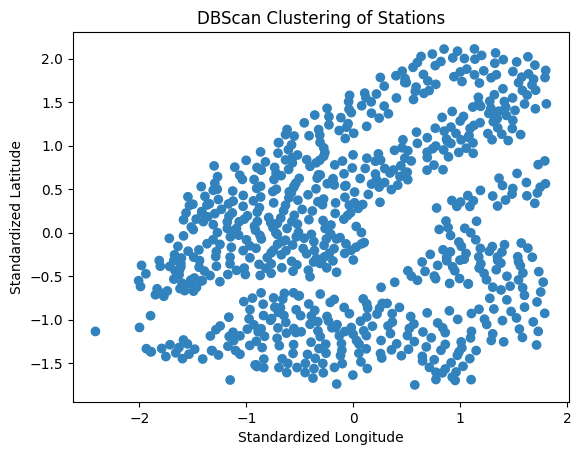

In [53]:
plt.scatter(departing_stations['start_station_longitude'], departing_stations['start_station_latitude'], c=departing_stations['clusterDBScan'],cmap='tab20c')
plt.xlabel('Standardized Longitude')
plt.ylabel('Standardized Latitude')
plt.title('DBScan Clustering of Stations')
plt.show()


In [54]:
departing_stations.nunique()

start_station_id           734
start_station_latitude     735
start_station_longitude    735
clusterKMean                20
clusterDBScan                1
dtype: int64

In [55]:
departing_stations.head(5)

,start_station_id,start_station_latitude,start_station_longitude,clusterKMean,clusterDBScan
0,72.0,0.927909,-0.866868,13,0
1,79.0,-0.282069,-1.492571,9,0
2,82.0,-0.481603,-1.173221,18,0
3,83.0,-1.168748,-0.002047,16,0
4,119.0,-0.860620,-0.086088,6,0


In [57]:
df = pd.merge(df, departing_stations[['start_station_id', 'clusterKMean', 'clusterDBScan']],
              on='start_station_id', how='left')


In [58]:
cluster_counts = df['clusterKMean'].value_counts().reset_index()
print(cluster_counts)
cluster_counts.columns = ['clusterKMean', 'count']
most_records_cluster = cluster_counts.iloc[0]['clusterKMean']
print(most_records_cluster)
selected_df = df[df['clusterKMean'] == most_records_cluster]



    clusterKMean    count
0              7  2153653
1              4  1834773
2              2  1495628
3             18  1476809
4              9  1414360
5             13  1394707
6             19  1262984
7             14   688078
8              3   671481
9             11   653231
10             1   589003
11            16   488559
12             6   378714
13            15   363415
14             0   324780
15             5   295705
16            12   238918
17            10   202257
18             8   112485
19            17    75905
7


In [59]:
# Extract month, day, and hour for both start and stop times
selected_df['start_month'] = selected_df['starttime'].dt.month
selected_df['start_day'] = selected_df['starttime'].dt.day
selected_df['start_hour'] = selected_df['starttime'].dt.hour

selected_df['stop_month'] = selected_df['stoptime'].dt.month
selected_df['stop_day'] = selected_df['stoptime'].dt.day
selected_df['stop_hour'] = selected_df['stoptime'].dt.hour

In [60]:
# Grouping by month, day, and hour for departures
departures = selected_df.groupby(['start_month', 'start_day', 'start_hour']).size().reset_index(name='departures')

# Grouping by month, day, and hour for arrivals
arrivals = selected_df.groupby(['stop_month', 'stop_day', 'stop_hour']).size().reset_index(name='arrivals')

# Merge departures and arrivals dataframes on month, day, and hour
aggregated_data = pd.merge(departures, arrivals, left_on=['start_month', 'start_day', 'start_hour'],
                            right_on=['stop_month', 'stop_day', 'stop_hour'], how='outer')

In [61]:
aggregated_data

,start_month,start_day,start_hour,departures,stop_month,stop_day,stop_hour,arrivals
0,1.0,1.0,0.0,12.0,1.0,1.0,0.0,10.0
1,1.0,1.0,1.0,22.0,1.0,1.0,1.0,20.0
2,1.0,1.0,2.0,9.0,1.0,1.0,2.0,13.0
3,1.0,1.0,3.0,10.0,1.0,1.0,3.0,9.0
4,1.0,1.0,4.0,3.0,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...
8725,12.0,31.0,23.0,6.0,12.0,31.0,23.0,6.0
8726,NaN,NaN,NaN,NaN,1.0,5.0,2.0,1.0
8727,NaN,NaN,NaN,NaN,1.0,7.0,5.0,1.0
8728,NaN,NaN,NaN,NaN,4.0,11.0,3.0,2.0


In [62]:
# Fill NaNs with 0 (if any hour doesn't have arrivals or departures)
aggregated_data.fillna(0, inplace=True)


In [63]:
# Drop redundant columns and rename for clarity
aggregated_data.drop(columns=['stop_month', 'stop_day', 'stop_hour'], inplace=True)
aggregated_data.rename(columns={'start_month': 'month', 'start_day': 'day', 'start_hour': 'hour'}, inplace=True)

In [64]:
# Add cluster information
aggregated_data['cluster'] = 7

aggregated_data.head(30)

,month,day,hour,departures,arrivals,cluster
0,1.0,1.0,0.0,12.0,10.0,7
1,1.0,1.0,1.0,22.0,20.0,7
2,1.0,1.0,2.0,9.0,13.0,7
3,1.0,1.0,3.0,10.0,9.0,7
4,1.0,1.0,4.0,3.0,4.0,7
5,1.0,1.0,5.0,3.0,3.0,7
6,1.0,1.0,6.0,6.0,3.0,7
7,1.0,1.0,7.0,7.0,10.0,7
8,1.0,1.0,8.0,11.0,10.0,7
9,1.0,1.0,9.0,15.0,15.0,7


In [65]:
aggregated_data = aggregated_data[aggregated_data['month'] != 0]


In [66]:
# Splitting the dataset into train and test sets
train_data = aggregated_data[aggregated_data['month'] <= 10]
test_data = aggregated_data[aggregated_data['month'] > 10]

X_train = train_data[['month', 'day', 'hour']]
y_train_departures = train_data['departures']
y_train_arrivals = train_data['arrivals']

X_test = test_data[['month', 'day', 'hour']]
y_test_departures = test_data['departures']
y_test_arrivals = test_data['arrivals']


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [68]:
# Train model for departures
rf_departures = RandomForestRegressor(n_estimators=100)
rf_departures.fit(X_train, y_train_departures)

# Train model for arrivals
rf_arrivals = RandomForestRegressor(n_estimators=100)
rf_arrivals.fit(X_train, y_train_arrivals)


RandomForestRegressor()

In [69]:
# Predictions
y_pred_departures = rf_departures.predict(X_test)
y_pred_arrivals = rf_arrivals.predict(X_test)

# Evaluating the performance using R^2 metric
r2_score_departures = r2_score(y_test_departures, y_pred_departures)
r2_score_arrivals = r2_score(y_test_arrivals, y_pred_arrivals)



print(r2_score_departures)
print(r2_score_arrivals)


-0.4423122358382754
-0.4365153528699921


As you can see. We score reallty badly! We have some ideas to fix this:

>1. Run other models
>
>2. feature engineering (day-of-the week, weekends, day/night, hyperparameter tuning)
>
>3. morning peak, evening peak, peak hour, day/night
>
>4. Standard scale the data
>
>5. Lag variables (this is probabaly the most import

**This is our plan for the exploratory section**

In our project for the exploratory analysis we want to focus on weather data (Temperature, Precipitation, Wind speed, Visibility, additional Weather conditions (sunny, cloudy, rain, etc.)). We want to use PCA to determine which of these factors have the highest impact on bike demand. This requires us finding additional weather data from other sources & doing PCA & Potentially Recursive Feature Elimination through some classification.